In [2]:
!pip install community
!pip install leidenalg

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.3 MB 5.3 MB/s 
     |████████████████████████████████| 3.3 MB 29.5 MB/s 


[14, 17, 30, 34, 40, 43, 44, 53, 66, 69, 77, 79, 81, 82, 84, 86, 88, 91, 97]
[3, 10, 13, 18, 28, 37, 55, 57, 58, 61, 63, 75, 83, 87]
[1, 11, 20, 24, 27, 31, 33, 46, 62, 71, 73, 80, 89]
[0, 5, 7, 15, 25, 35, 36, 41, 60, 72, 92]
[2, 6, 39, 45, 49, 65, 70, 74, 76, 85, 94]
[4, 9, 22, 38, 56, 59, 64, 67]
[16, 32, 47, 51, 52, 78, 93, 99]
[12, 19, 21, 42, 48, 54, 90]
[8, 23]
[50, 98]
[29, 68]
[26]
[95]
[96]


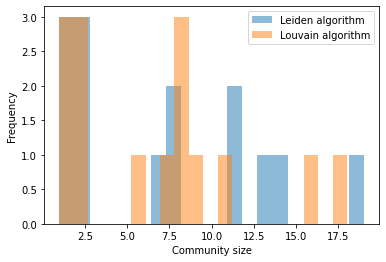

In [15]:
import networkx as nx
import leidenalg
import matplotlib.pyplot as plt
import community.community_louvain as community_louvain
import matplotlib.pyplot as plt
import random 
import igraph 

# Create an empty graph
g = nx.Graph()

# Add 100 nodes to the graph
for i in range(100):
    g.add_node(i)

# Add 150 edges to the graph
for i in range(150):
    # Generate two random nodes
    n1 = random.randint(0, 99)
    n2 = random.randint(0, 99)
    # Add an edge between the two nodes
    g.add_edge(n1, n2)

g2 = igraph.Graph.from_networkx(g)
# Identify the communities within the graph using the Leiden algorithm
leiden_partition = leidenalg.find_partition(g2, leidenalg.ModularityVertexPartition)
#print(leiden_partition)
# Calculate the sizes of the communities
leiden_sizes = []
for com in leiden_partition:
  print(com)
  members = [nodes for nodes in com]
  leiden_sizes.append(len(members))




# Find the communities within the graph using the Louvain algorithm
louvain_partition = community_louvain.best_partition(g)

# Calculate the sizes of the communities
louvain_sizes = []
for com in set(louvain_partition.values()):
    members = [nodes for nodes in louvain_partition.keys() if louvain_partition[nodes] == com]
    louvain_sizes.append(len(members))

# Plot the histograms of the community sizes
plt.hist(leiden_sizes, bins=20, alpha=0.5, label="Leiden algorithm")
plt.hist(louvain_sizes, bins=20, alpha=0.5, label="Louvain algorithm")
plt.xlabel("Community size")
plt.ylabel("Frequency")
plt.legend()
plt.show()